In [2]:
import os
os.chdir('../')
%pwd

'/home/dheeraj/Projects/Explainable-AI-Non-EEG'

# Load model for evaluation

In [3]:
from src.constants.constants import *
from src.utils.utils import *
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

2023-11-17 00:31:36.533674: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 00:31:36.644491: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 00:31:36.644521: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 00:31:36.645098: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 00:31:36.690403: I tensorflow/core/platform/cpu_feature_g

In [4]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


def preprocess_test_data(test_data):
    """
    Preprocesses the given test data by subtracting the mean and dividing by the standard deviation.

    Parameters:
        test_data (ndarray): The test data to be preprocessed.

    Returns:
        ndarray: The preprocessed test data.
    """
    # Normalize the test data
    test_data = (test_data - test_data.mean()) / test_data.std()
 
    # Reshape the test data to include an additional dimension
    test_data = test_data.reshape(test_data.shape + (1,))
    
    return test_data

def evaluate_test_data(test_data, test_labels, model):
    """
    Evaluate the test data using the trained model.
    
    Args:
        test_data (numpy.ndarray): The test data.
        test_labels (numpy.ndarray): The labels for the test data.
        model (object): The trained model.
    """
    # Preprocess the test data
    test_data = preprocess_test_data(test_data)
    
    # Predict the labels for the test data
    pred = model.predict(test_data)
    
    # Convert the predicted probabilities to class labels
    y_pred = np.argmax(pred, axis=1)
    
    # Compute the confusion matrix
    cm = confusion_matrix(np.int16(test_labels), y_pred, normalize='true')
    
    # Compute the accuracy
    acc = accuracy_score(np.int16(test_labels), y_pred) * 100
    
    # Print the accuracy
    print('Accuracy:', acc)
    
    # Plot the normalized confusion matrix
    sns.heatmap(cm/np.sum(cm, axis=1), annot=True, fmt='.2%', cmap='Blues')

In [5]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

def preprocess_test_data(test_data):
    """
    Preprocesses the given test data by subtracting the mean and dividing by the standard deviation.

    Parameters:
        test_data (ndarray): The test data to be preprocessed.

    Returns:
        ndarray: The preprocessed test data.
    """
    # Normalize the test data
    normalized_test_data = (test_data - test_data.mean()) / test_data.std()
 
    # Reshape the test data to include an additional dimension
    return normalized_test_data.reshape(normalized_test_data.shape + (1,))

def evaluate_test_data(test_data, test_labels, model):
    """
    Evaluate the test data using the trained model.
    
    Args:
        test_data (numpy.ndarray): The test data.
        test_labels (numpy.ndarray): The labels for the test data.
        model (object): The trained model.
    """
    # Preprocess the test data
    preprocessed_test_data = preprocess_test_data(test_data)
    
    # Predict the labels for the test data
    predictions = model.predict(preprocessed_test_data)
    
    # Convert the predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Define class labels for the confusion matrix
    class_labels = {0: 'Relax', 1: 'PhysicalStress', 2: 'CognitiveStress', 3: 'EmotionalStress'}
    
    # Compute the confusion matrix
    confusion_mat = confusion_matrix(np.int16(test_labels), predicted_labels, normalize='true')
    
    # Compute the accuracy
    accuracy = accuracy_score(np.int16(test_labels), predicted_labels) * 100
    
    # Print the accuracy
    print('Accuracy:', accuracy)
    
    # Plot the normalized confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat / np.sum(confusion_mat, axis=1), annot=True, fmt='.2%', cmap='Blues')
    plt.title('Normalized Confusion Matrix')
    
    plt.yticks(ticks=[0, 1, 2, 3], labels=[class_labels[i] for i in range(4)], rotation=0, va='center')
    plt.xticks(ticks=[0, 1, 2, 3], labels=[class_labels[i] for i in range(4)], ha='center')
    
    plt.show()


In [6]:
# Load train data from pickle file
train_df = load_dataframe_from_pickle(os.path.join(SAVED_DATASET_DIR, "train_data_LOSegO_4_1_1Hz.pkl"))
train_data, train_labels = dataframe_to_array(train_df)

In [7]:
train_data_mean = train_data.mean()
train_data_std = train_data.std()

2023-11-17 00:31:43.248712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-11-17 00:31:43.248733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pop-os
2023-11-17 00:31:43.248736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pop-os
2023-11-17 00:31:43.248795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.113.1
2023-11-17 00:31:43.248803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.113.1
2023-11-17 00:31:43.248804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.113.1


5/5 [==============================] - 0s 49ms/step
Accuracy: 97.14285714285714


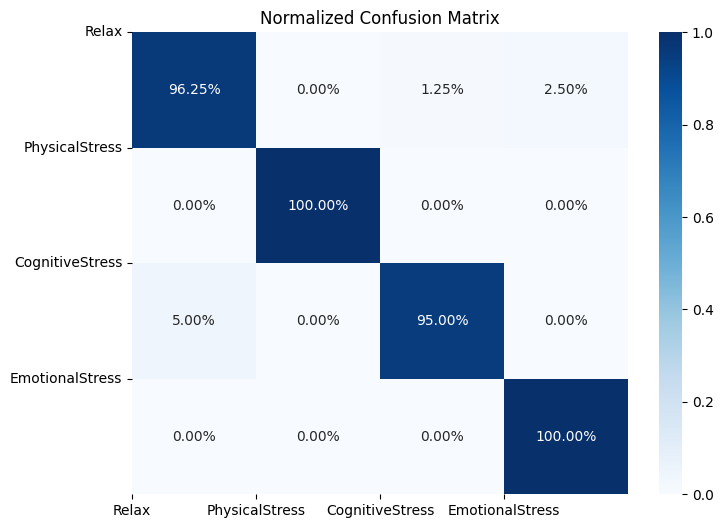

In [8]:
# Load the model
MODEL_PATH = os.path.join(SAVED_MODEL_DIR, 'model_LOSegO_4_1_1Hz.h5')
model = tf.keras.models.load_model(MODEL_PATH)

# Load test data from pickle file
test_df = load_dataframe_from_pickle(os.path.join(SAVED_DATASET_DIR, "test_data_LOSegO_4_1_1Hz.pkl"))
test_data, test_labels = dataframe_to_array(test_df)

# Evaluate the test data
evaluate_test_data(test_data, test_labels, model)

In [9]:
import matplotlib.pyplot as plt

modals = MODALS
x_test = np.array([np.array(xi, dtype='float32') for xi in test_df['Data'].values])
y_test = test_df['Label']    
y_test_ori = test_df['Label_ori']
x_test_std = x_test.std()
x_test_mean = x_test.mean()

x_test = (x_test - train_data_mean) / train_data_std
#x_test = (x_test - x_test_mean)/(x_test_std)
x_test = x_test.reshape(x_test.shape + (1,))

get_last_conv = keras.backend.function([model.layers[0].input], [model.layers[-3].output])
last_conv = get_last_conv([x_test])[0]
get_softmax = keras.backend.function([model.layers[0].input], [model.layers[-1].output])
softmax = get_softmax(([x_test]))[0]
softmax_weight = model.get_weights()[-2]
CAM = np.dot(last_conv, softmax_weight)
#x_test = (x_test * x_test_std) + x_test_mean



In [147]:
softmax

array([[9.1687846e-01, 4.9178698e-04, 9.4095059e-03, 7.3220350e-02]],
      dtype=float32)

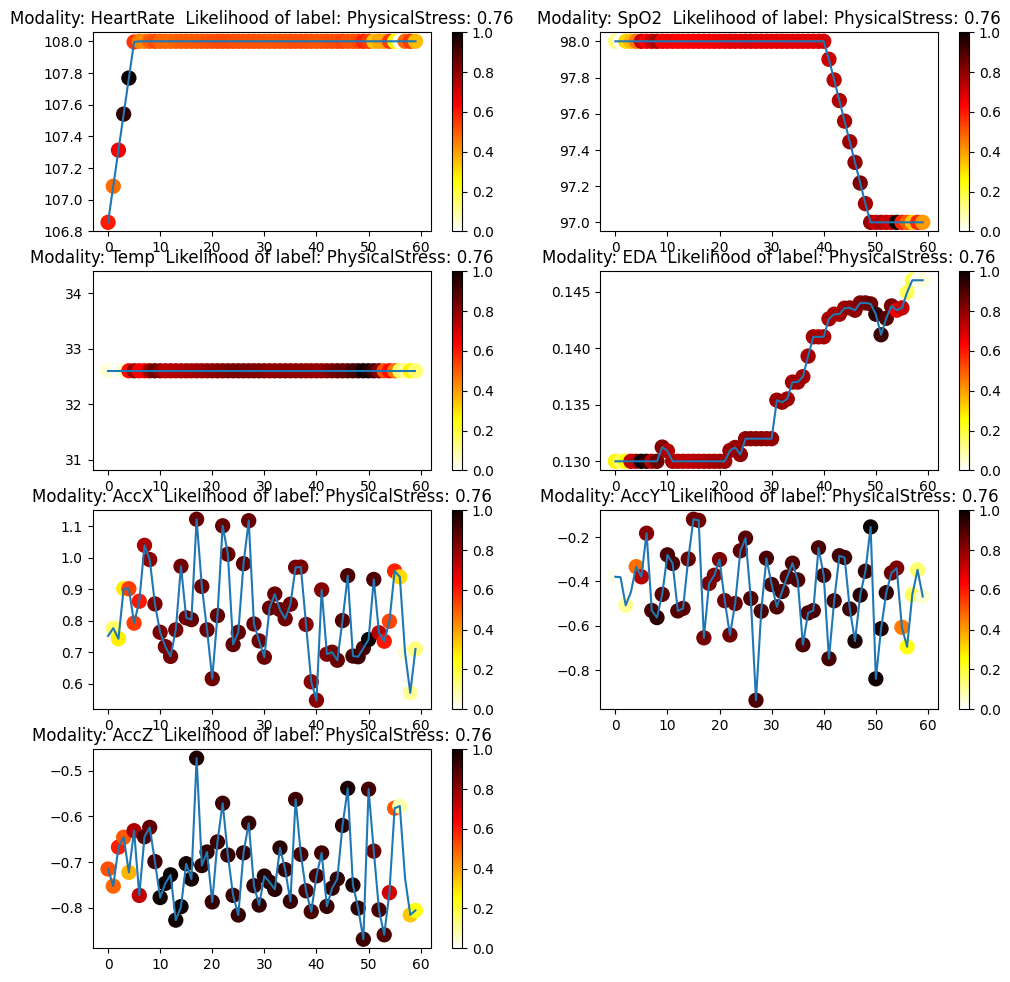

In [153]:
a = test_df[4:5]
x_test = np.array([np.array(xi, dtype='float32') for xi in a['Data'].values[0]])
x_test = (x_test - train_data_mean) / train_data_std
x_test = x_test.reshape(x_test.shape + (1,))
x_test = np.expand_dims(x_test, axis=0)        
last_conv = get_last_conv([x_test])[0]        
softmax = get_softmax([x_test])[0]        
CAM = np.dot(last_conv, softmax_weight)
x_test = (x_test * train_data_std) + train_data_mean    

label_index = 4
a = 5  # number of rows
b = 2  # number of columns
d = 1  # initialize plot counter
plt.figure(figsize=(12, 15))
for modal in range(7):
    c = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))

    plt.subplot(a, b, d)
    plt.title(f"Modality: {modals[modal]}  Likelihood of label: {y_test_ori[label_index]}: {softmax[0][int(y_test[label_index])]:.2f}")
    plt.plot(x_test[0, :, modal]) #.squeeze())
    plt.scatter(np.arange(len(x_test[0])), x_test[0, :, modal], 
                cmap='hot_r', c=c[0, :, modal, int(y_test[label_index])], s=100)
    plt.colorbar()
    d += 1

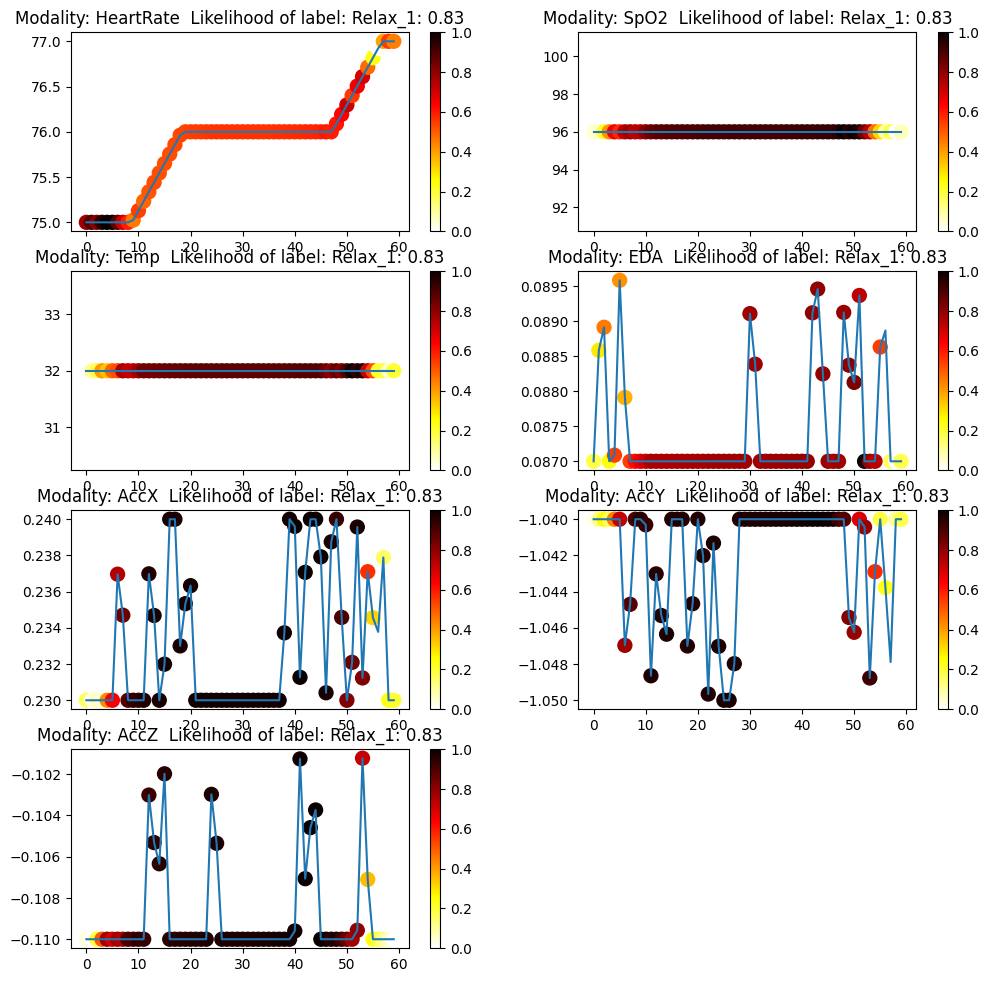

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def preprocess_data(test_df):
    # Preprocess the test data
    x_test = np.array([np.array(xi, dtype='float32') for xi in test_df['Data'].values[0]])
    y_test = test_df['Label']
    y_test_ori = test_df['Label_ori']
    #x_test_std = x_test.std()
    #x_test_mean = x_test.mean()
    x_test = (x_test - train_data_mean) / train_data_std
    x_test = x_test.reshape(x_test.shape + (1,))
    #x_test = (x_test * x_test_std) + x_test_mean
    return x_test, y_test, y_test_ori

def plot_grad_cam(test_df, model, modals, label_index):
    """
    Plot the Grad-CAM visualization for different modalities.

    Args:
    - test_df (pd.DataFrame): DataFrame containing test data.
    - model (keras.Model): Trained Keras model.
    - softmax_weight (np.ndarray): Weights from the softmax layer of the model.
    - modals (list): List of modality names.

    Returns:
    - None (Displays the plots)
    """
    get_last_conv = keras.backend.function([model.layers[0].input], [model.layers[-3].output])
    get_softmax = keras.backend.function([model.layers[0].input], [model.layers[-1].output])
    softmax_weight = model.get_weights()[-2]
    a = 5  # number of rows
    b = 2  # number of columns
    d = 1  # initialize plot counter

    plt.figure(figsize=(12, 15))

    for row in test_df:
        
        x_test, y_test, y_test_ori = preprocess_data(row)
        x_test = np.expand_dims(x_test, axis=0)        
        last_conv = get_last_conv([x_test])[0]        
        softmax = get_softmax([x_test])[0]        
        CAM = np.dot(last_conv, softmax_weight)
        x_test = (x_test * train_data_std) + train_data_mean    

        for modal in range(7):
            c = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))

            plt.subplot(a, b, d)
            plt.title(f"Modality: {modals[modal]}  Likelihood of label: {y_test_ori[label_index]}: {softmax[label_index][int(y_test[label_index])]:.2f}")
            plt.plot(x_test[label_index, :, modal].squeeze())
            plt.scatter(np.arange(len(x_test[modal])), x_test[label_index, :, modal].squeeze(), 
                        cmap='hot_r', c=c[label_index, :, modal, int(y_test[modal])].squeeze(), s=100)
            plt.colorbar()
            d += 1
    
    plt.tight_layout()
    plt.show()

# Usage:

plot_grad_cam(test_df[0:1], model, MODALS, label_index=0)


TypeError: string indices must be integers

<Figure size 1200x1500 with 0 Axes>

In [16]:
plot_grad_cam(test_df, model, MODALS, label_index=1)

TypeError: string indices must be integers

<Figure size 1200x1500 with 0 Axes>

In [17]:
def visualize_grad_cam(image, model, model_layer, subject, class_name='Relax_1', color=False):
    """
    Visualizes the Grad-CAM output over an image.

    Args:
        image (np.ndarray): The input image data.
        model (tf.keras.Model): The trained CNN model.
        model_layer (str): The layer name in the model to retrieve.
        subject (str): The subject identifier.
        class_name (str): The class name (default: 'Relax_1').
        color (bool): Flag to indicate if the image is color (default: False).

    Returns:
        np.ndarray: Normalized heatmap of Grad-CAM.
    """
    img_bgr = image
    
    # Convert image to grayscale if needed
    if color:
        test_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        test_img = np.expand_dims(test_img, axis=0)
    else:
        test_img = img_bgr
        test_img = np.expand_dims(test_img, axis=0)
    
    # Compute the Grad-CAM
    last_conv_layer = model.get_layer(model_layer)
    heatmap_model = tf.keras.models.Model(inputs=model.input,
                                          outputs=[last_conv_layer.output, model.output])
    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(test_img)
        loss = predictions[:, np.argmax(predictions[0])]
        grads = gtape.gradient(loss, conv_output)
        pooled_grads = tf.keras.backend.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    
    # Prepare the heatmap for visualization
    img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_GRAY2RGB)
    img_bgr = (((img_bgr - img_bgr.min()) / (img_bgr.max() - img_bgr.min())) * 255).astype(np.uint8)
    
    squeezed_hm = np.squeeze(heatmap)
    normalized_hm = cv2.resize(squeezed_hm, (img_bgr.shape[1], img_bgr.shape[0]))
    
    # Plot the normalized Grad-CAM heatmap over the image
    normalized_hm_vis = (255 * normalized_hm).astype(np.uint8)
    normalized_hm_vis = cv2.applyColorMap(normalized_hm_vis, cv2.COLORMAP_JET)
    
    rows, cols = 1, 1
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Set yticks and their labels
    #lt.setp(axs, yticks=[0, 1, 2, 3, 4, 5, 6], yticklabels=MODALS)    
    
    ax1 = axs.imshow(cv2.cvtColor(normalized_hm_vis.transpose(1, 0, 2), cv2.COLOR_BGR2RGB), cmap='jet', vmin=0, vmax=1)
    axs.set_title(f'Normalized Grad-CAM | {class_name} | {subject}')
    fig.colorbar(ax1, ax=axs, shrink=0.38)

    axs.set_aspect('equal')

    return normalized_hm


In [18]:
x_test = np.array([np.array(xi, dtype='float32') for xi in test_df['Data'].values])
y_test = test_df['Label']    
y_test_ori = test_df['Label_ori']
x_test_std = x_test.std()
x_test_mean = x_test.mean()
x_test = (x_test - train_data_mean)/(train_data_std)
x_test = x_test.reshape(x_test.shape + (1,))


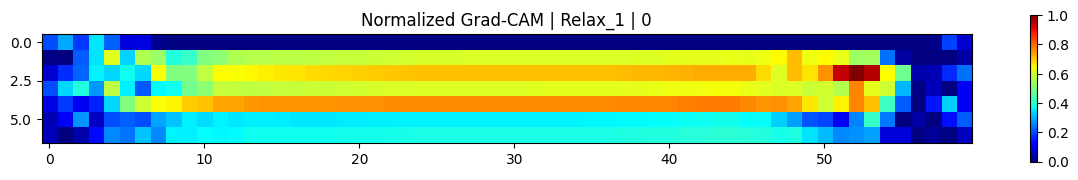

In [19]:
a = visualize_grad_cam(x_test[0].squeeze(), model=model, model_layer='activation_951', subject=0,
                  class_name=y_test_ori[0], color=False)

In [ ]:
last_conv_layer = 'activation_951' #'activation_951'


for j in range(len(LABELS)): 
    norm_hm = []
    for i in range(j, 140, 7): #(subject*num_seg, num_seg + subject*num_seg):
        norm_hm.append(visualize_grad_cam(x_test[i].squeeze(), model=model, model_layer=last_conv_layer, subject=i,
                  class_name=y_test_ori[i], color=False))
        #grad_cam(x_test[i].squeeze(), model=model, model_layer=last_conv_layer, subject=i,
                 #class_name=y_test_ori[i], color=False)
    label_avg = np.mean(norm_hm, axis=0)
    normalized_hm_vis = (255 * label_avg).astype(np.uint8)
    normalized_hm_vis = cv2.applyColorMap(normalized_hm_vis, cv2.COLORMAP_JET)

    plt.figure(figsize=(15, 5))
    plt.yticks([0,1,2,3,4,5,6], labels=MODALS)    
    plt.title('Average Grad-CAM | ' + str(LABELS[j]))
    plt.imshow(cv2.cvtColor(normalized_hm_vis.transpose(1, 0, 2), cv2.COLOR_BGR2RGB), cmap='jet', vmin=0, vmax=1)
    plt.colorbar(shrink=0.38)
    #plt.savefig('saved_model_new/All_modalities/LoSego/Seq_seg/60s/Test_1seg_5th/'+str(label[j])+ '-avg')

In [154]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#from src.constants import LABELS, MODALS



class GradCAMVisualizer:
    def __init__(self, model, model_layer, modals, labels):
        """
        Initialize GradCAMVisualizer class.
        
        Args:
        - model: The model to be visualized.
        - model_layer: The layer of the model to be visualized.
        - modals: The modals used in the visualization.
        """
        self.model = model
        self.model_layer = model_layer
        self.modals = modals
        self.labels = labels

    @staticmethod
    def preprocess_data(test_df):
        """
        Preprocess the test data.
        
        Args:
        - test_df: The test dataframe.
        
        Returns:
        - Preprocessed test data.
        """
        x_test = np.array([np.array(xi, dtype='float32') for xi in test_df['Data'].values[0]])
        y_test = test_df['Label']
        y_test_ori = test_df['Label_ori']
        
        #x_test_mean = np.mean(x_test)
        #x_test_std = np.std(x_test)
        x_test = (x_test - train_data_mean)/(train_data_std)
        x_test = x_test.reshape(x_test.shape + (1,))
        
        return x_test, y_test, y_test_ori

    def vis_grad_cam_one_modal(self, test_sample, label_index=0): #, softmax_weight):
        """
        Plot Grad-CAM visualization.
        
        Args:
        - test_df: The test data.
        """
        

        get_last_conv = keras.backend.function([self.model.layers[0].input], [self.model.layers[-3].output])
        get_softmax = keras.backend.function([self.model.layers[0].input], [self.model.layers[-1].output])
        softmax_weight = model.get_weights()[-2]
        

        for row in range(len(test_sample)): #test_sample:
            x_test, y_test, y_test_ori = self.preprocess_data(test_sample[row:row+1])
            x_test = np.expand_dims(x_test, axis=0)
            last_conv = get_last_conv([x_test])[0]
            softmax = get_softmax([x_test])[0]         
            CAM = np.dot(last_conv, softmax_weight)
            x_test = (x_test * train_data_std) + train_data_mean
            num_rows = 5
            num_cols = 2
            plot_counter = 1
            plt.figure(figsize=(12, 15))

            for modal in range(7):
                normalized_CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))

                plt.subplot(num_rows, num_cols, plot_counter)
                plt.title(f"Modality: {modals[modal]}  Likelihood of label: {y_test_ori[label_index]}: {softmax[0][int(y_test[label_index])]:.2f}")
                plt.plot(x_test[0, :, modal].squeeze())
                plt.scatter(np.arange(len(x_test[0])), x_test[0, :, modal], 
                            cmap='hot_r', c=normalized_CAM[0, :, modal, int(y_test[label_index])], s=100)
                plt.colorbar()
                plot_counter += 1

            plt.tight_layout()
            plt.show()
        

    def vis_grad_cam_all_modal(self, test_sample, subject, class_name='Relax_1', color=False, plot=True):

        x_test, y_test, y_test_ori = self.preprocess_data(test_sample)

        # Convert image to grayscale if needed
        img_gray = cv2.cvtColor(x_test, cv2.COLOR_BGR2GRAY) if color else x_test

        # Expand dimensions of the grayscale image
        img_gray = np.expand_dims(img_gray, axis=0)

        # Get the last convolutional layer and create a heatmap model
        last_conv_layer = self.model.get_layer(self.model_layer)
        heatmap_model = tf.keras.models.Model(inputs=self.model.input,
                                            outputs=[last_conv_layer.output, self.model.output])

        # Compute the gradients and pooled gradients
        with tf.GradientTape() as tape:
            conv_output, predictions = heatmap_model(img_gray)
            loss = predictions[:, np.argmax(predictions[0])]
            grads = tape.gradient(loss, conv_output)
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        # Compute the heatmap
        heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
        heatmap = np.maximum(heatmap, 0)
        max_heat = np.max(heatmap)
        if max_heat == 0:
            max_heat = 1e-10
        heatmap /= max_heat

        # Convert the input image to RGB and normalize its values
        img_rgb = cv2.cvtColor(x_test, cv2.COLOR_GRAY2RGB)
        img_rgb = (((img_rgb - img_rgb.min()) / (img_rgb.max() - img_rgb.min())) * 255).astype(np.uint8)

        squeezed_hm = np.squeeze(heatmap)
        normalized_hm = cv2.resize(squeezed_hm, (img_rgb.shape[1], img_rgb.shape[0]))

        # Apply color mapping to the normalized heatmap
        normalized_hm_vis = (255 * normalized_hm).astype(np.uint8)
        normalized_hm_vis = cv2.applyColorMap(normalized_hm_vis, cv2.COLORMAP_JET)

        # Plot the heatmap
        if plot:
            rows, cols = 1, 1
            fig, axs = plt.subplots(rows, cols, figsize=(7, 5))

            # Set yticks and their labels       
            plt.setp(axs, yticks=[0, 1, 2, 3, 4, 5, 6], yticklabels=MODALS)  

            axs1 = axs.imshow(cv2.cvtColor(normalized_hm_vis.transpose(1, 0, 2), cv2.COLOR_BGR2RGB), cmap='jet', 
                              vmin=0, vmax=1)
            axs.set_title(f'Normalized Grad-CAM | {class_name} | {subject}')
            fig.colorbar(axs1, shrink=0.38)

            axs.set_aspect('equal')

        return normalized_hm


    def average_grad_cam(self, df):
        """
        Calculate the average Grad-CAM for each label and plot the results.

        Args:
            x_test (numpy.ndarray): Input test data.
            y_test_ori (numpy.ndarray): Original test labels.
            last_conv_layer: Last convolutional layer of the model.
            LABELS (list): List of label names.

        Returns:
            list: List of average heatmaps for each label.
        """
        avg_heatmaps = []
        
        for label in range(len(LABELS)):
            norm_hm = []
            
            for i in range(label, 140, 7):  # Looping through segments per subject
                norm_hm.append(self.vis_grad_cam_all_modal(df[i:i+1], subject=SUBJECTS[0], color=False, plot=False))
            
            label_avg = np.mean(norm_hm, axis=0)
            #avg_heatmaps.append(label_avg)

            # Plotting the average Grad-CAM
            normalized_hm_vis = (255 * label_avg).astype(np.uint8)
            normalized_hm_vis = cv2.applyColorMap(normalized_hm_vis, cv2.COLORMAP_JET)

            plt.figure(figsize=(15, 5))
            plt.yticks([0, 1, 2, 3, 4, 5, 6], labels=self.modals)
            plt.title('Average Grad-CAM | ' + str(LABELS[label]))
            plt.imshow(cv2.cvtColor(normalized_hm_vis.transpose(1, 0, 2), cv2.COLOR_BGR2RGB), cmap='jet',
                        vmin=0, vmax=1)
            plt.colorbar(shrink=0.38)
            plt.show()

        #return avg_heatmaps

In [155]:
# Example usage:
visualizer = GradCAMVisualizer(model=model, model_layer='activation_951', modals=MODALS, labels=LABELS)


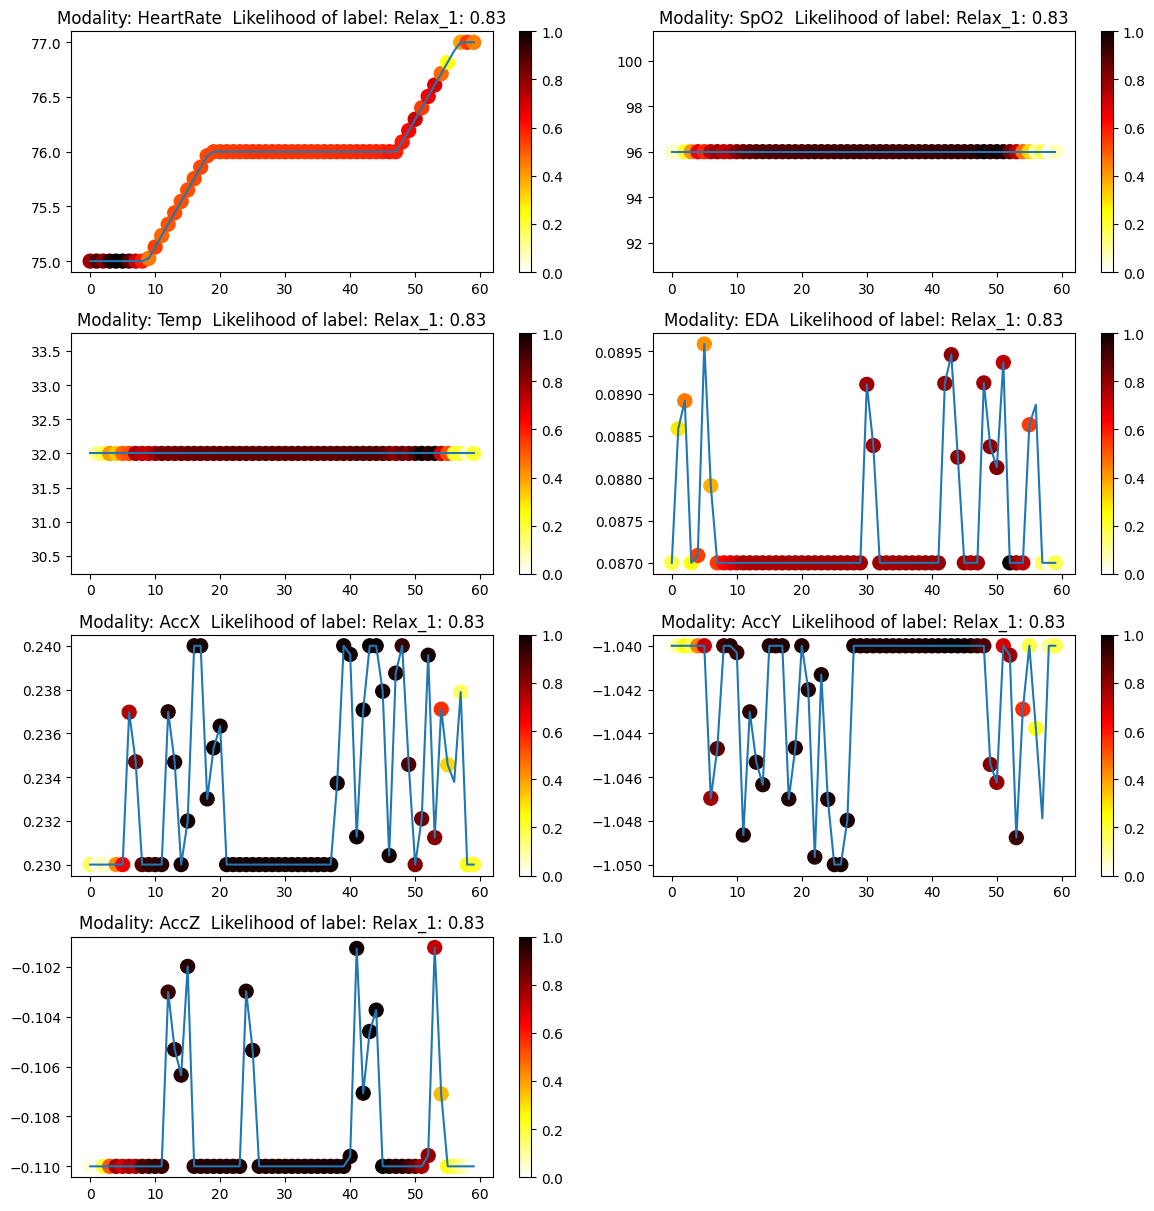

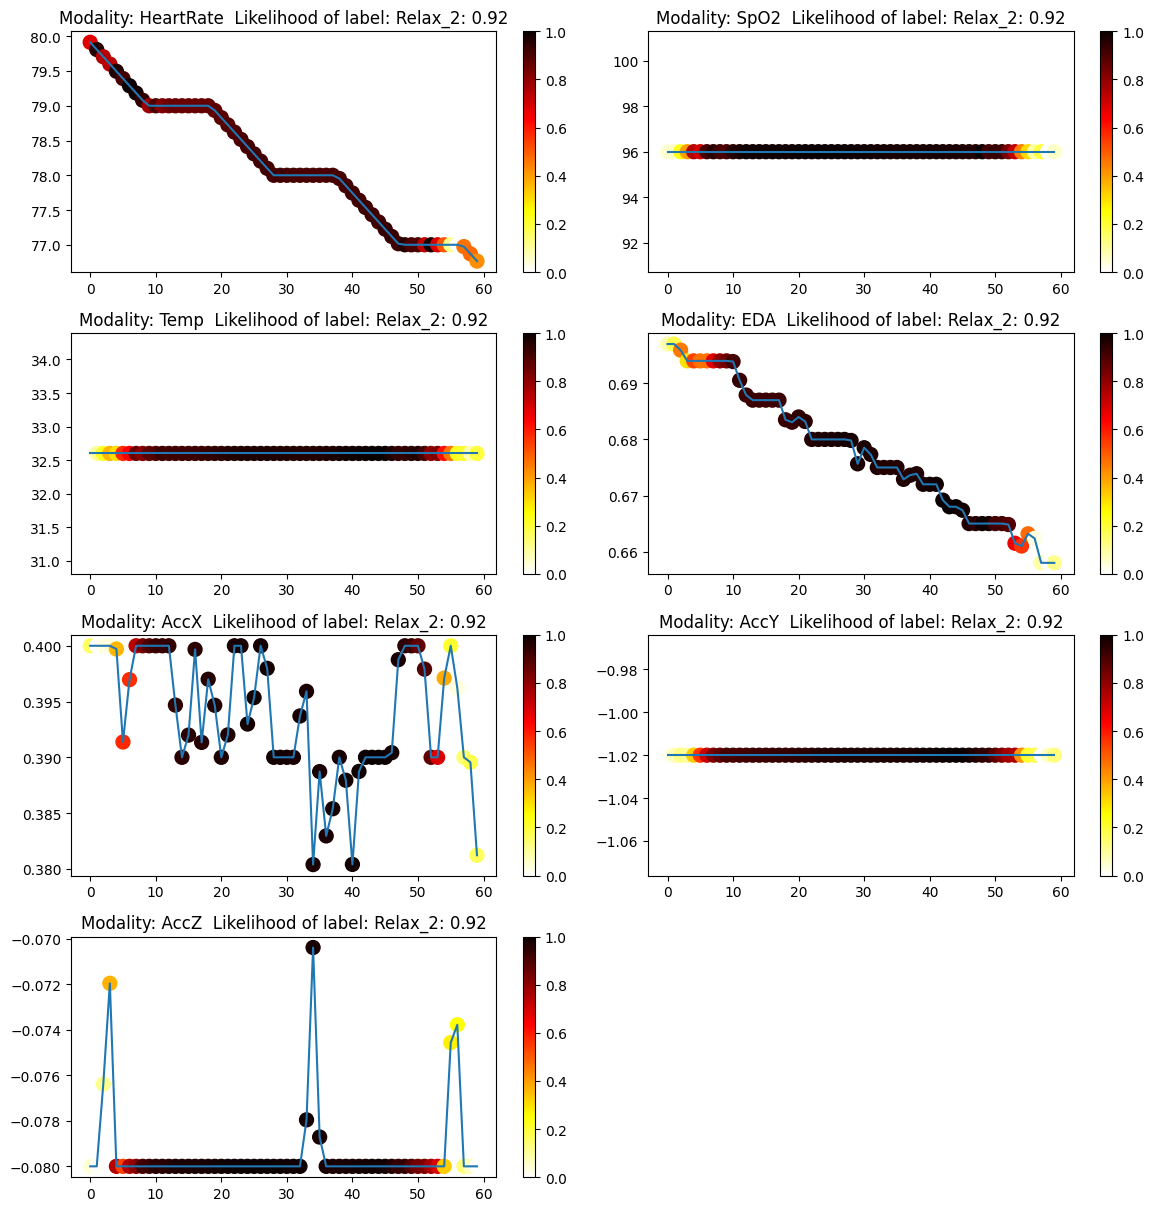

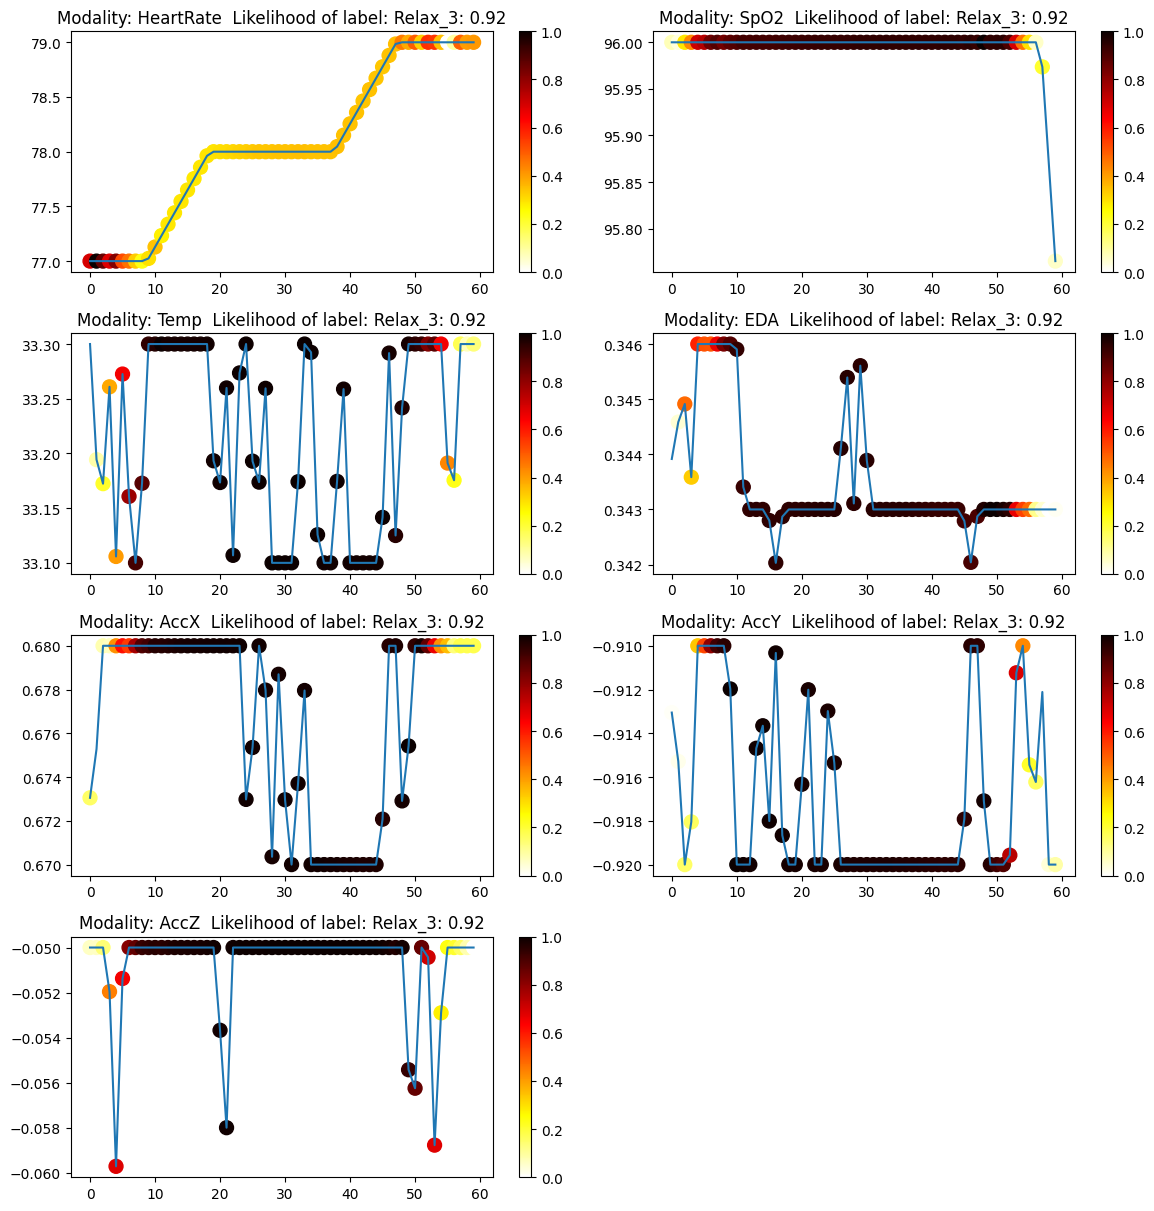

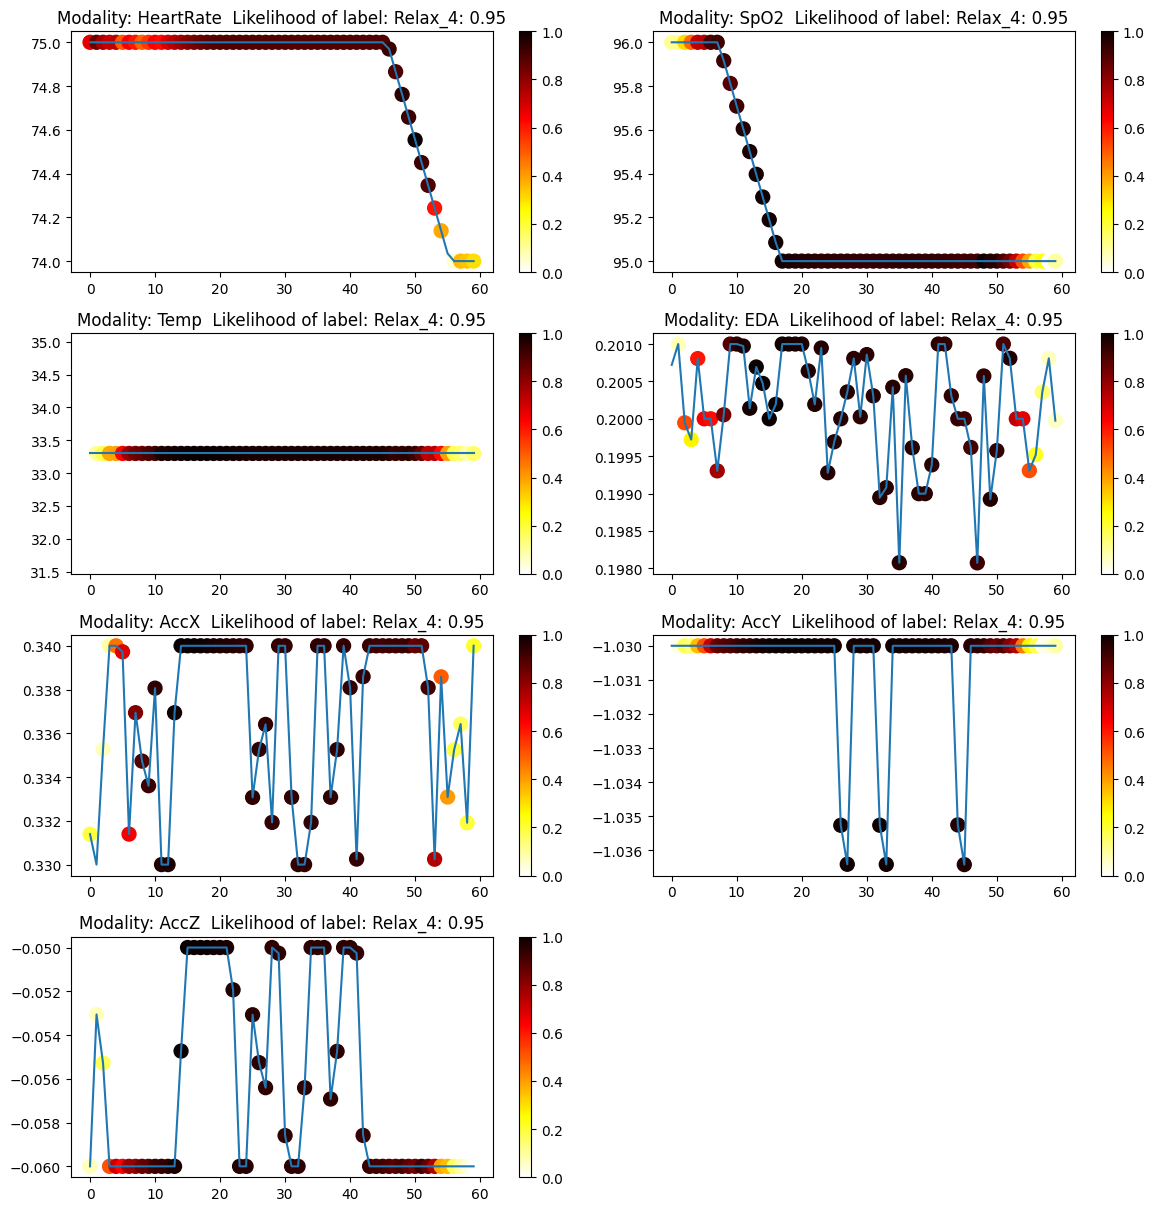

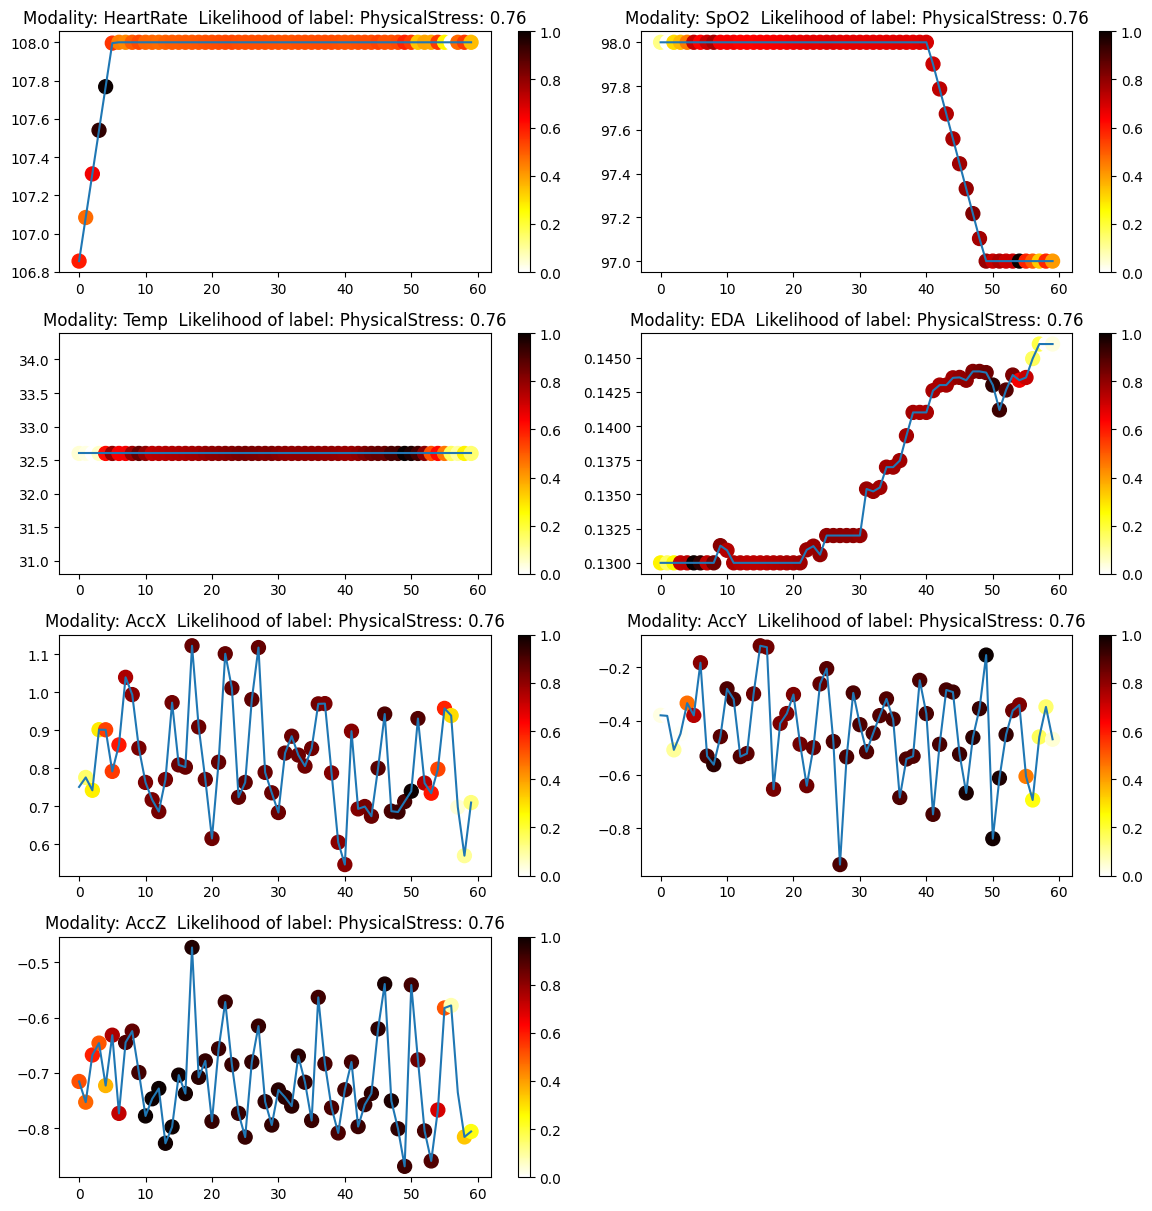

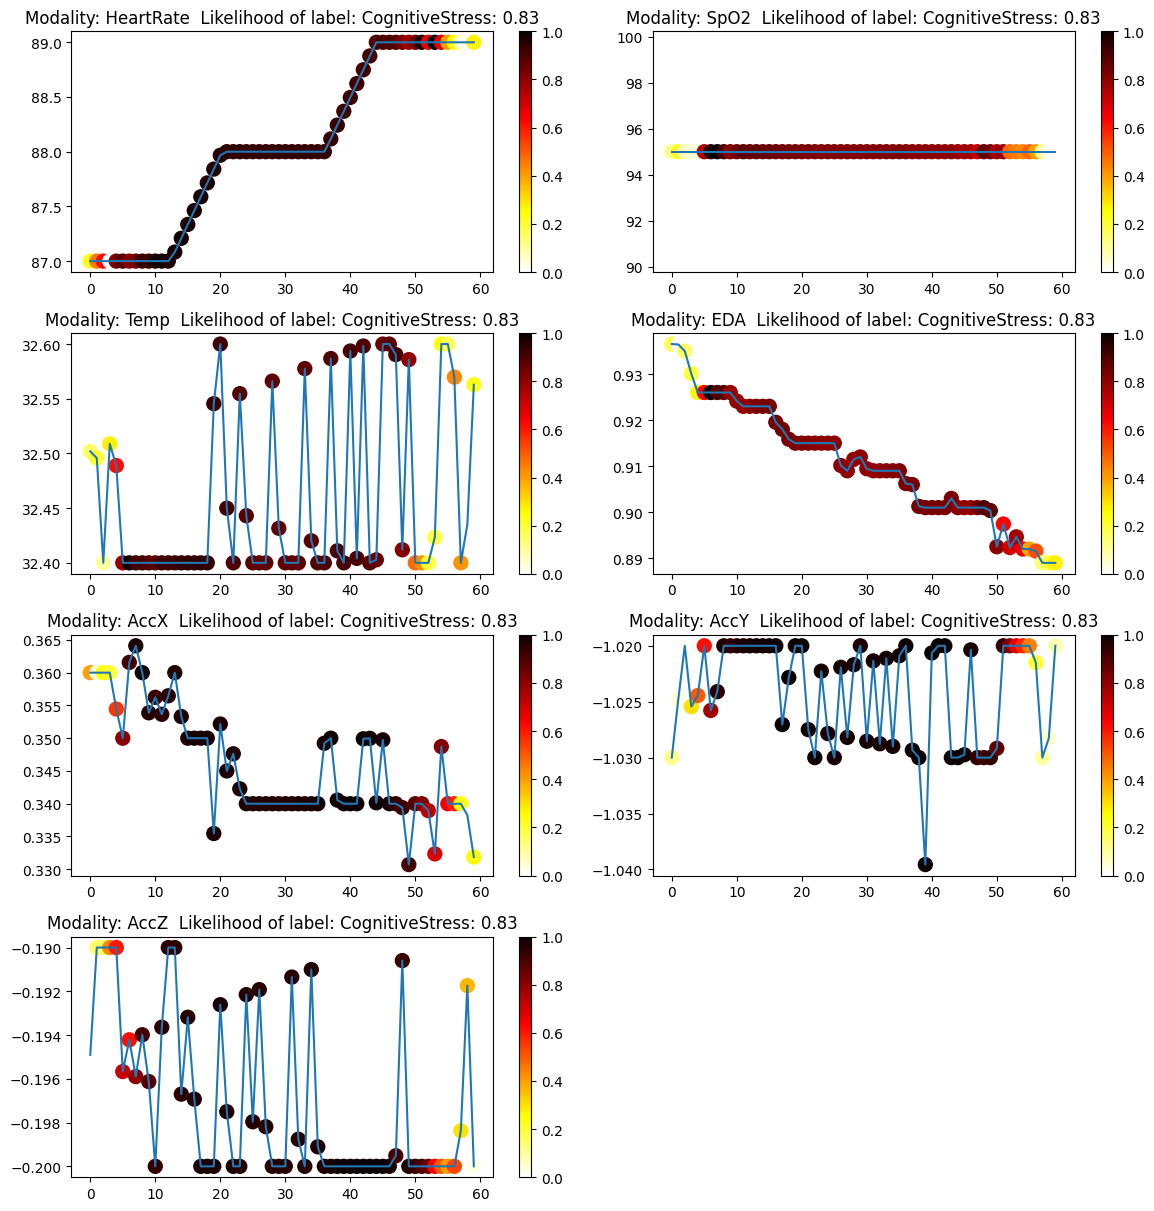

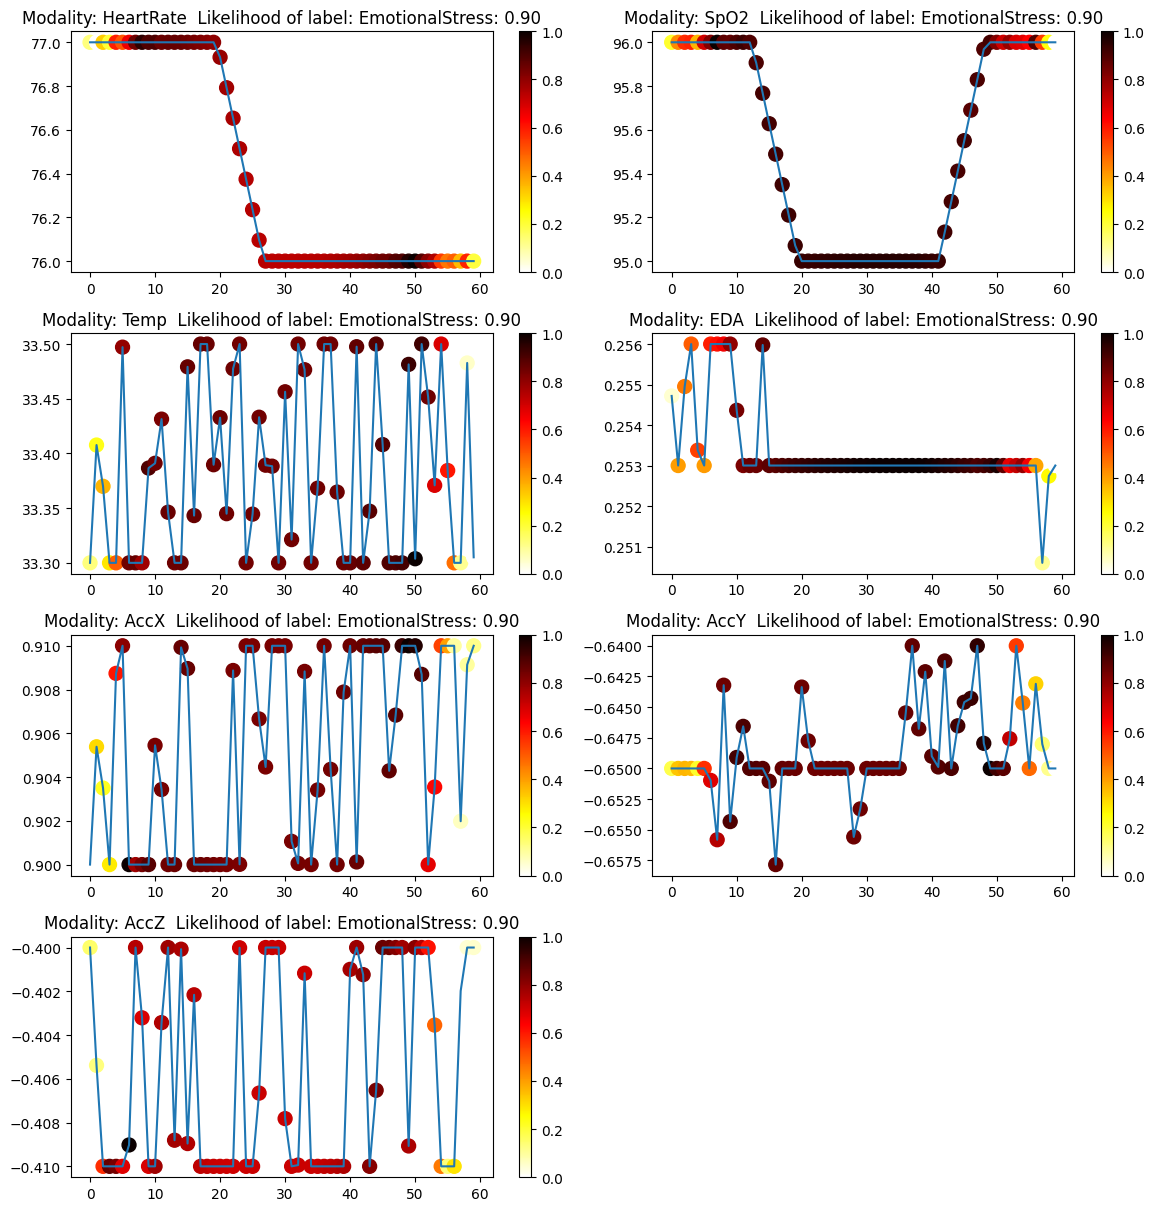

In [158]:
for i in range(7):
    visualizer.vis_grad_cam_one_modal(test_df[i:i+1], label_index=i)

In [76]:
test_df[0:7]

,Data,Label,Label_ori
0,"[[75.0, 96.0, 32.0, 0.087, 0.23, -1.04, -0.11]...",0,Relax_1
1,"[[79.91316429315734, 96.0, 32.6, 0.697, 0.4, -...",0,Relax_2
2,"[[77.0, 96.0, 33.3, 0.3439159430357761, 0.6730...",0,Relax_3
3,"[[75.0, 96.0, 33.3, 0.20072212573810339, 0.331...",0,Relax_4
4,"[[106.85654741229587, 98.0, 32.6, 0.13, 0.7511...",1,PhysicalStress
5,"[[87.0, 95.0, 32.50191038555058, 0.93652865578...",2,CognitiveStress
6,"[[77.0, 96.0, 33.3, 0.25472038902396754, 0.9, ...",3,EmotionalStress


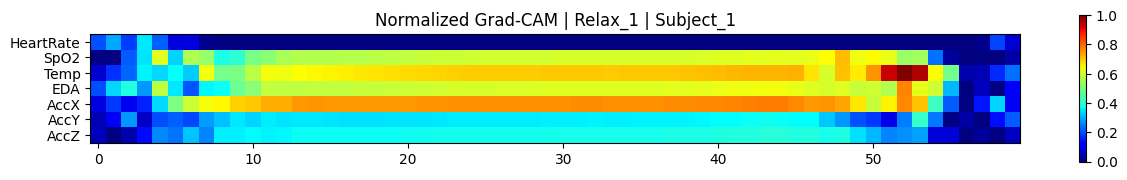

In [277]:
normalized_hm = visualizer.vis_grad_cam_all_modal(test_df[0:1], subject=SUBJECTS[0], color=False, plot=True)

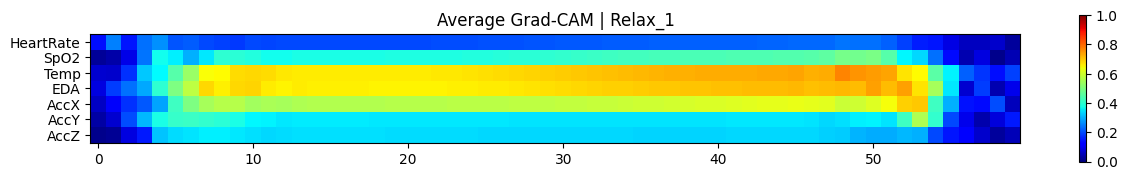

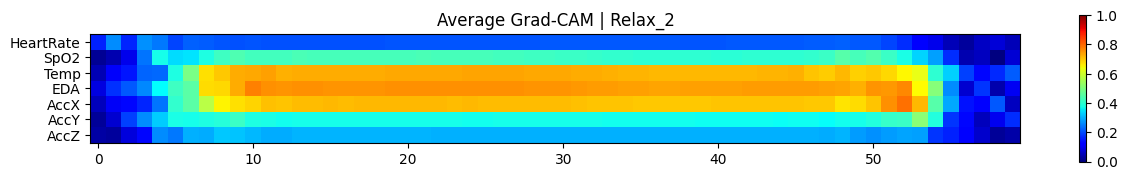

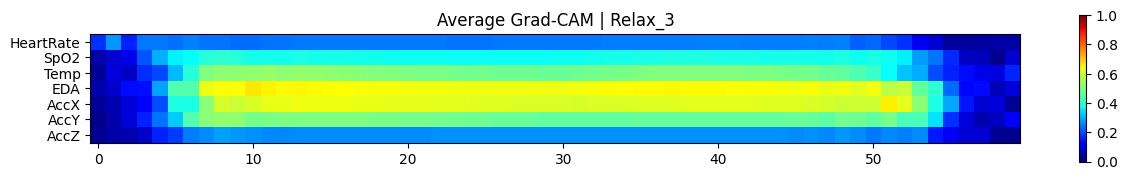

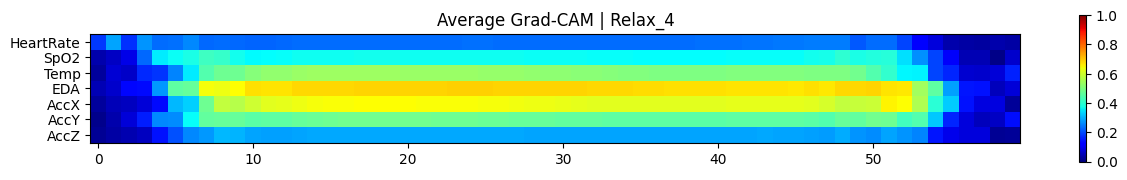

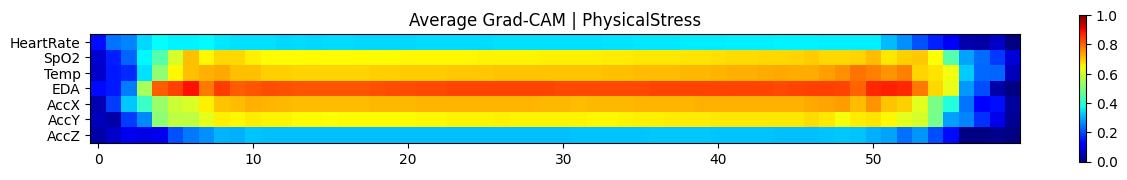

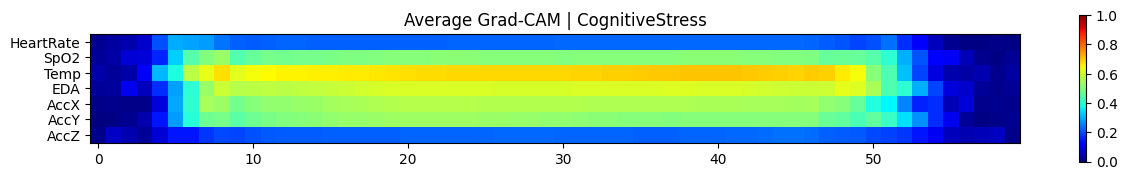

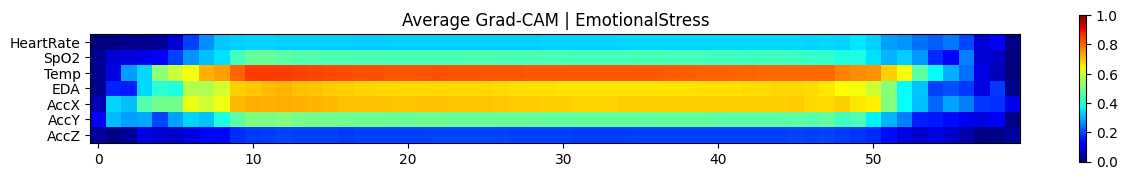

In [266]:
visualizer.average_grad_cam(test_df)